# Challenge Set 3 (Linear Splitting)¶

Topic: Learn Pandas using Movie Data

Date: 01/22/2016

Name: Kenneth Myers

Worked with: NA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline


/Users/kenn/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Challenge 1


In [2]:
movies_2015 = pd.read_csv('2015_movies.csv', index_col=0)

In [3]:
movies_2015['const'] = [1 for i in range(len(movies_2015.index))]

In [4]:
movies_2015.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,const
0,Star Wars: The Force Awakens,200000000,858953106,J.J. Abrams,PG-13,136,2015-12-18,1
1,Jurassic World,150000000,652270625,Colin Trevorrow,PG-13,124,2015-06-12,1
2,Avengers: Age of Ultron,250000000,459005868,Joss Whedon,PG-13,141,2015-05-01,1
3,Inside Out,175000000,356461711,Pete Docter,PG,94,2015-06-19,1
4,Furious 7,190000000,353007020,James Wan,PG-13,137,2015-04-03,1


In [5]:
dtg = movies_2015[['const', 'DomesticTotalGross']].set_index(movies_2015.Title)

In [6]:
model = sm.OLS(dtg.DomesticTotalGross, dtg.const)

In [7]:
results = model.fit()

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Sat, 23 Jan 2016   Prob (F-statistic):                nan
Time:                        03:59:07   Log-Likelihood:                -2005.8
No. Observations:                 100   AIC:                             4014.
Df Residuals:                      99   BIC:                             4016.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.006e+08   1.25e+07      8.046      0.000      7.58e+07  1.25e+08
==============================================================================
Omnibus:                      106.210   Durbin-Watson:                   0.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1281.682
Skew:                           3.610   Prob(JB):                    4.86e-279
Kurtosis:                      18.983   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

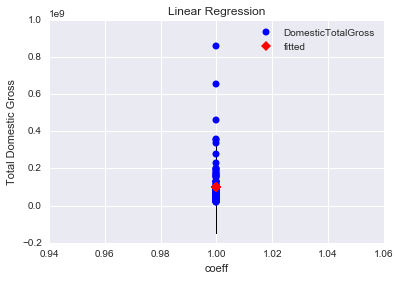

In [9]:
sm.graphics.plot_fit(results, 0)
plt.ylabel("Total Domestic Gross")
plt.xlabel("coeff")
plt.title("Linear Regression")

Without any variables the model can only be represented by x = 1. The fitted value in the plot represents the expected value of the dependent variable, y. 

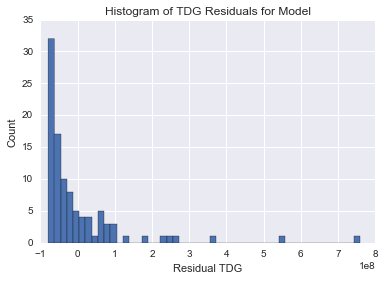

In [10]:
results.resid.hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Residual TDG')
plt.title('Histogram of TDG Residuals for Model')

Residual distribution is positively skewed. A sizeable amount of the data is below the average and there are data points pulling the mean upwards.

## Challenge 2 

In [11]:
dtg2 = movies_2015[['const', 'DomesticTotalGross', 'Runtime']].set_index(movies_2015.Title)

In [12]:
dtg2 = dtg2.dropna()

In [13]:
model2 = sm.OLS(dtg2['DomesticTotalGross'], dtg2[['Runtime', 'const']])

In [14]:
results2 = model2.fit()

In [15]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     7.327
Date:                Sat, 23 Jan 2016   Prob (F-statistic):            0.00801
Time:                        03:59:08   Log-Likelihood:                -2002.2
No. Observations:                 100   AIC:                             4008.
Df Residuals:                      98   BIC:                             4014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Runtime     1.954e+06   7.22e+05      2.707      0.008      5.22e+05  3.39e+06
const      -1.202e+08   8.25e+07     -1.458      0.148     -2.84e+08  4.34e+07
==============================================================================
Omnibus:                      100.678   Durbin-Watson:                   0.207
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1079.891
Skew:                           3.390   Prob(JB):                    3.20e-235
Kurtosis:                      17.601   Cond. No.                         777.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

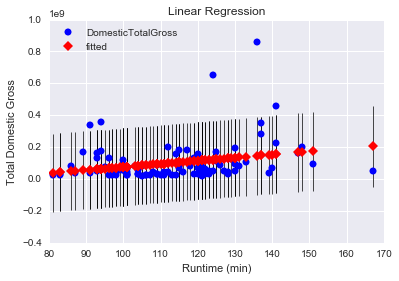

In [16]:
sm.graphics.plot_fit(results2, 0)
plt.ylabel("Total Domestic Gross")
plt.xlabel("Runtime (min)")
plt.title("Linear Regression")

In [17]:
resid_series2 = results2.resid

In [18]:
dtg2['resid'] = resid_series2

In [19]:
dtg2 = dtg2.sort_values(by='DomesticTotalGross', ascending=True)

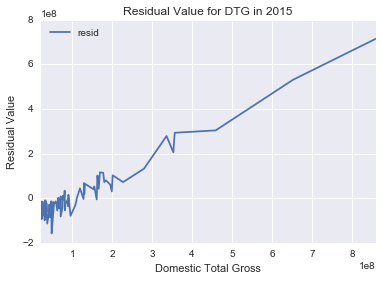

In [20]:
dtg2.plot('DomesticTotalGross', 'resid')
plt.xlabel('Domestic Total Gross')
plt.ylabel('Residual Value')
plt.title('Residual Value for DTG in 2015')

As the dependent variable, DTG, increases, the residuals also increase and get further from the expected value. The model is worse for larger Domestic Total Grosses.

## Challenge 3

In [21]:
dtg3 = movies_2015

In [22]:
dummies = pd.get_dummies(dtg3.Rating)

In [23]:
dtg3 = pd.concat([dtg3, dummies], axis=1)

In [24]:
dtg3.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,const,G,PG,PG-13,R
0,Star Wars: The Force Awakens,200000000,858953106,J.J. Abrams,PG-13,136,2015-12-18,1,0,0,1,0
1,Jurassic World,150000000,652270625,Colin Trevorrow,PG-13,124,2015-06-12,1,0,0,1,0
2,Avengers: Age of Ultron,250000000,459005868,Joss Whedon,PG-13,141,2015-05-01,1,0,0,1,0
3,Inside Out,175000000,356461711,Pete Docter,PG,94,2015-06-19,1,0,1,0,0
4,Furious 7,190000000,353007020,James Wan,PG-13,137,2015-04-03,1,0,0,1,0


In [25]:
model3 = sm.OLS(dtg3['DomesticTotalGross'], dtg3[['PG-13', 'const']])

In [26]:
results3 = model3.fit()

In [27]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.670
Date:                Sat, 23 Jan 2016   Prob (F-statistic):              0.199
Time:                        03:59:08   Log-Likelihood:                -2004.9
No. Observations:                 100   AIC:                             4014.
Df Residuals:                      98   BIC:                             4019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
PG-13       3.222e+07   2.49e+07      1.292      0.199     -1.73e+07  8.17e+07
const       8.511e+07   1.73e+07      4.926      0.000      5.08e+07  1.19e+08
==============================================================================
Omnibus:                      101.688   Durbin-Watson:                   0.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.657
Skew:                           3.428   Prob(JB):                    2.01e-243
Kurtosis:                      17.874   Cond. No.                         2.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

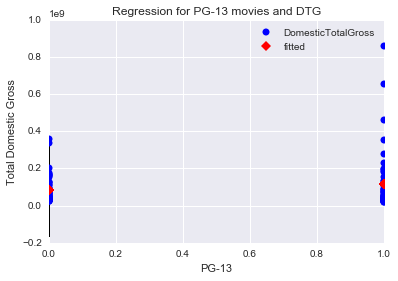

In [28]:
sm.graphics.plot_fit(results3, 0)
plt.ylabel("Total Domestic Gross")
plt.xlabel("PG-13")
plt.title("Regression for PG-13 movies and DTG")

In [29]:
resid_series3 = results3.resid

In [30]:
dtg3['resid'] = resid_series3

In [31]:
dtg3 = dtg3.sort_values(by='DomesticTotalGross', ascending=True)

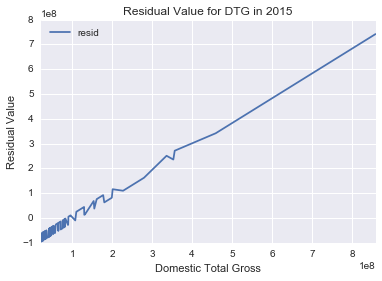

In [32]:
dtg3.plot('DomesticTotalGross', 'resid')
plt.xlabel('Domestic Total Gross')
plt.ylabel('Residual Value')
plt.title('Residual Value for DTG in 2015')

Again the residual values increase for increasing Domestic total gross. The Regression plot is similar to the plot from challenge one except instead of just one option, x = 1, x can either be 0 or 1. Two distributions are seen, with two expected values, one for PG-13 movies (x = 1) and one for non-PG-13 movies (x = 0). 

## Challenge 4

#### Combine challenge 2 and 3

In [33]:
dtg4 = dtg3
dtg4 = dtg4.dropna()
model4 = sm.OLS(dtg4['DomesticTotalGross'], dtg4[['Runtime', 'PG-13', 'const']])
results4 = model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     2.591
Date:                Sat, 23 Jan 2016   Prob (F-statistic):             0.0817
Time:                        03:59:09   Log-Likelihood:                -1569.0
No. Observations:                  78   AIC:                             3144.
Df Residuals:                      75   BIC:                             3151.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Runtime     1.773e+06   9.34e+05      1.899      0.061     -8.68e+04  3.63e+06
PG-13       3.001e+07   3.07e+07      0.976      0.332     -3.12e+07  9.12e+07
const      -1.059e+08   1.08e+08     -0.977      0.332     -3.22e+08   1.1e+08
==============================================================================
Omnibus:                       73.408   Durbin-Watson:                   0.217
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              488.831
Skew:                           2.957   Prob(JB):                    7.11e-107
Kurtosis:                      13.744   Cond. No.                         836.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### PG and runtime

In [34]:
dtg5 = dtg3
dtg5 = dtg5.dropna()
model5 = sm.OLS(dtg5['DomesticTotalGross'], dtg5[['Runtime', 'PG', 'const']])
results5 = model5.fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     3.174
Date:                Sat, 23 Jan 2016   Prob (F-statistic):             0.0475
Time:                        03:59:09   Log-Likelihood:                -1568.4
No. Observations:                  78   AIC:                             3143.
Df Residuals:                      75   BIC:                             3150.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Runtime     2.374e+06   9.75e+05      2.434      0.017      4.31e+05  4.32e+06
PG          6.001e+07   4.18e+07      1.435      0.156     -2.33e+07  1.43e+08
const      -1.715e+08   1.17e+08     -1.466      0.147     -4.05e+08  6.15e+07
==============================================================================
Omnibus:                       77.799   Durbin-Watson:                   0.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.830
Skew:                           3.106   Prob(JB):                    8.43e-134
Kurtosis:                      15.246   Cond. No.                         918.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Domestic Gross and Budget

In [35]:
dtg6 = movies_2015
dtg6 = dtg6.dropna()
model6 = sm.OLS(dtg6['DomesticTotalGross'], dtg6[['Budget', 'const']])
results6 = model6.fit()
results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     47.19
Date:                Sat, 23 Jan 2016   Prob (F-statistic):           1.55e-09
Time:                        03:59:09   Log-Likelihood:                -1552.8
No. Observations:                  78   AIC:                             3110.
Df Residuals:                      76   BIC:                             3114.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Budget         1.4144      0.206      6.869      0.000         1.004     1.824
const       1.454e+07   1.91e+07      0.762      0.449     -2.35e+07  5.26e+07
==============================================================================
Omnibus:                       64.681   Durbin-Watson:                   0.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              461.313
Skew:                           2.415   Prob(JB):                    6.72e-101
Kurtosis:                      13.891   Cond. No.                     1.44e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

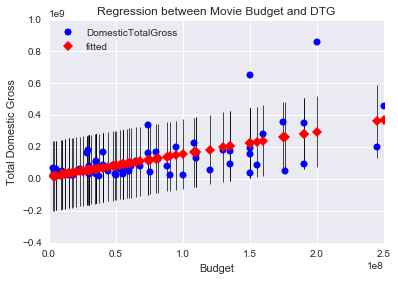

In [36]:
sm.graphics.plot_fit(results6, 0)
plt.ylabel("Total Domestic Gross")
plt.xlabel("Budget")
plt.title("Regression between Movie Budget and DTG")

/Users/kenn/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


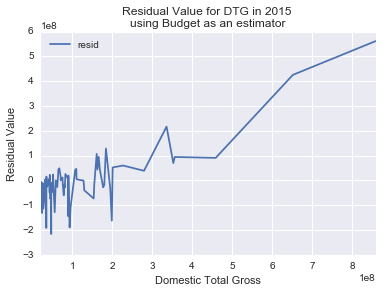

In [37]:
resid_series6 = results6.resid
dtg6['resid'] = resid_series6
dtg6 = dtg6.sort_values(by='DomesticTotalGross', ascending=True)

dtg6.plot('DomesticTotalGross', 'resid')
plt.xlabel('Domestic Total Gross')
plt.ylabel('Residual Value')
plt.title('Residual Value for DTG in 2015 \nusing Budget as an estimator')

Budget has better correlation with DTG than previous tests but it has a lower log-likelihood value. Once again, residuals increase with DTG but less so than previous tests.

#### Budget + PG-13

In [38]:
dtg7 = dtg3
dtg7 = dtg7.dropna()
model7 = sm.OLS(dtg7['DomesticTotalGross'], dtg7[['Budget', 'PG-13', 'const']])
results7 = model7.fit()
results7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     23.30
Date:                Sat, 23 Jan 2016   Prob (F-statistic):           1.35e-08
Time:                        03:59:10   Log-Likelihood:                -1552.8
No. Observations:                  78   AIC:                             3112.
Df Residuals:                      75   BIC:                             3119.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Budget         1.4077      0.212      6.650      0.000         0.986     1.829
PG-13       3.861e+06   2.52e+07      0.153      0.879     -4.64e+07  5.42e+07
const       1.308e+07   2.15e+07      0.610      0.544     -2.97e+07  5.58e+07
==============================================================================
Omnibus:                       64.304   Durbin-Watson:                   0.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              453.231
Skew:                           2.402   Prob(JB):                     3.82e-99
Kurtosis:                      13.788   Cond. No.                     2.13e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Lower adj R-sq value than the last test.

#### Budget + Runtime

In [39]:
dtg8 = movies_2015
dtg8 = dtg8.dropna()
model8 = sm.OLS(dtg8['DomesticTotalGross'], dtg8[['Budget', 'Runtime', 'const']])
results8 = model8.fit()
results8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     23.29
Date:                Sat, 23 Jan 2016   Prob (F-statistic):           1.36e-08
Time:                        03:59:10   Log-Likelihood:                -1552.8
No. Observations:                  78   AIC:                             3112.
Df Residuals:                      75   BIC:                             3119.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Budget         1.4076      0.222      6.338      0.000         0.965     1.850
Runtime     6.773e+04   8.04e+05      0.084      0.933     -1.53e+06  1.67e+06
const        7.15e+06   8.98e+07      0.080      0.937     -1.72e+08  1.86e+08
==============================================================================
Omnibus:                       64.603   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              459.369
Skew:                           2.413   Prob(JB):                    1.77e-100
Kurtosis:                      13.866   Cond. No.                     6.74e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.74e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Again the the adj r-sq value dropped from when budget alone was the estimator.

## Challenge 5

In [64]:
from sklearn.cross_validation import train_test_split

In [65]:
train, test = train_test_split(movies_2015, test_size = 0.25)

In [66]:
train = train.dropna()
test = test.dropna()

In [67]:
model9 = sm.OLS(train['DomesticTotalGross'], train[['Budget', 'const']])
results9 = model9.fit()
print('Parameters: ', results9.params)
print('R2: ', results9.rsquared)



Parameters:  Budget          1.609018
const     5328411.159445
dtype: float64
R2:  0.376024251973


In [68]:
results9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     33.75
Date:                Sat, 23 Jan 2016   Prob (F-statistic):           3.10e-07
Time:                        03:59:44   Log-Likelihood:                -1157.1
No. Observations:                  58   AIC:                             2318.
Df Residuals:                      56   BIC:                             2322.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Budget         1.6090      0.277      5.809      0.000         1.054     2.164
const       5.328e+06   2.36e+07      0.226      0.822      -4.2e+07  5.26e+07
==============================================================================
Omnibus:                       50.740   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.917
Skew:                           2.306   Prob(JB):                     9.99e-62
Kurtosis:                      12.746   Cond. No.                     1.35e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
test = test.sort_values(by='Budget', ascending=True)

In [70]:
print(results9.predict(test[['Budget', 'const']]))

[  1.01554664e+07   2.94636874e+07   3.42907427e+07   4.55538716e+07
   6.16440558e+07   6.48620926e+07   6.96891479e+07   7.61252215e+07
   8.25612952e+07   9.38244241e+07   9.86514794e+07   1.14741664e+08
   1.24395774e+08   1.58185161e+08   1.98410621e+08   2.22545898e+08
   2.46681174e+08   3.11041911e+08   3.99537924e+08   4.07583016e+08]


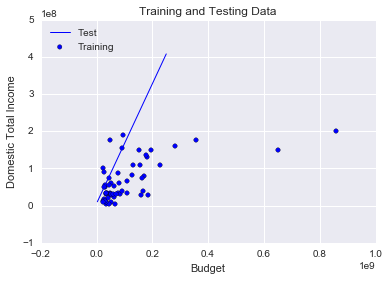

In [71]:
plt.scatter(train.DomesticTotalGross, train.Budget, label='Training')
plt.plot(test.Budget, results9.predict(test[['Budget', 'const']]), color='blue',linewidth=1, label='Test')
plt.xlabel('Budget')
plt.ylabel('Domestic Total Income')
plt.legend(loc='upper left')
plt.title('Training and Testing Data')
